In [1]:
%load_ext jupyternotify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import yfinance as yf

<IPython.core.display.Javascript object>

In [2]:
df = yf.download(['SPY', '^TNX', '^VIX'], 
                 interval='1mo', start='1990-01-01', end='2024-01-01')[['Adj Close']]['Adj Close']
df = df.dropna()
df['SPY'] = np.log(df['SPY']).diff()*100
df['^TNX'] = df['^TNX'].diff()*100

# df['^TNX'] = np.log(df['^TNX'])*100
df['^VIX'] = np.log(df['^VIX'])
df = df.dropna()
df

[*********************100%***********************]  3 of 3 completed


,SPY,^TNX,^VIX
Date,,,
1993-03-01,1.743969,0.000000,2.528126
1993-04-01,-2.120860,1.999998,2.519308
1993-05-01,2.661191,10.999966,2.600465
1993-06-01,-0.346102,-35.999966,2.421257
1993-07-01,0.219579,2.999973,2.462150
...,...,...,...
2023-01-01,6.557068,-34.999990,2.965273
2023-02-01,-2.546420,38.699985,3.030134
2023-03-01,3.259777,-42.199993,2.928524


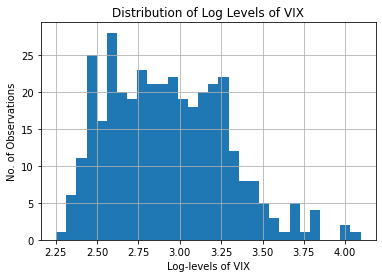

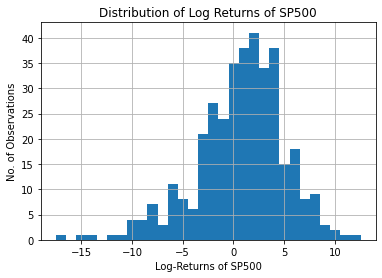

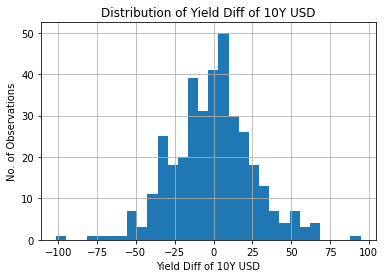

In [3]:
plt.hist(df['^VIX'], bins=30)
plt.grid()
plt.title('Distribution of Log Levels of VIX')
plt.xlabel("Log-levels of VIX")
plt.ylabel("No. of Observations")
plt.show()

plt.hist(df['SPY'], bins=30)
plt.grid()
plt.title("Distribution of Log Returns of SP500")
plt.xlabel("Log-Returns of SP500")
plt.ylabel("No. of Observations")
plt.show()

plt.hist(df['^TNX'], bins=30)
plt.grid()
plt.title("Distribution of Yield Diff of 10Y USD")
plt.xlabel("Yield Diff of 10Y USD")
plt.ylabel("No. of Observations")
plt.show()

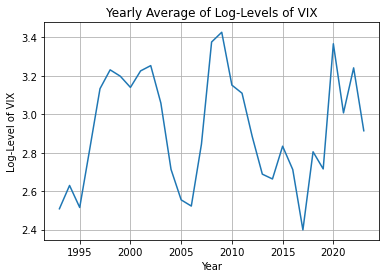

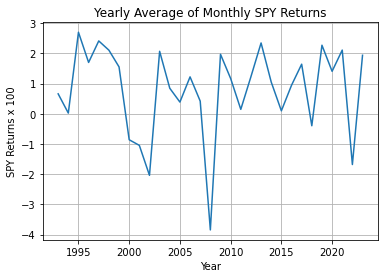

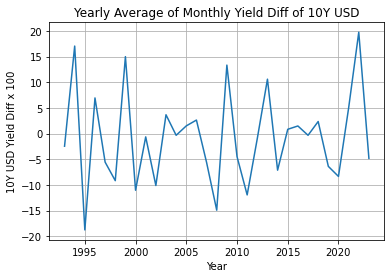

In [4]:
df['year'] = df.index.year
df_year = df.groupby('year').mean()
plt.plot(df_year['^VIX'])
plt.title("Yearly Average of Log-Levels of VIX")
plt.xlabel("Year")
plt.ylabel("Log-Level of VIX")
plt.grid()
plt.show()

plt.plot(df_year['SPY'])
plt.title("Yearly Average of Monthly SPY Returns")
plt.xlabel("Year")
plt.ylabel("SPY Returns x 100")
plt.grid()
plt.show()

plt.plot(df_year['^TNX'])
plt.title("Yearly Average of Monthly Yield Diff of 10Y USD")
plt.xlabel("Year")
plt.ylabel("10Y USD Yield Diff x 100")
plt.grid()
plt.show()

In [5]:
df.describe()

,SPY,^TNX,^VIX,year
count,363.000000,363.000000,363.000000,363.000000
mean,0.771557,-0.659229,2.926365,2007.793388
std,4.399740,25.784048,0.350811,8.750612
min,-17.477495,-101.300001,2.252344,1993.000000
25%,-1.572517,-15.700006,2.625029,2000.000000
50%,1.401443,0.499964,2.903617,2008.000000
75%,3.622707,14.450002,3.179511,2015.000000
max,12.540770,94.599986,4.092510,2023.000000
